# **Machine Learning : Supervised Learning : Regression : Univariate Regression**

## **Data Provided:**
### **Years of Experience Vs Salary of Employees of an Organization**

## **Problem to be solved:**

### **To predict the "Salary" of an Employee based on the "Years of Experience"**

In [173]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score


In [174]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [175]:
#Read the Data from Google Drive
dataset = pd.read_csv('gdrive/My Drive/Expsal/salary_data.csv')
print(dataset.shape)
dataset.head()


(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [176]:
#Checking the Missing Data and Datatypes of the Columns of the Data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [177]:
#Check the Statistical Description of the Data
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


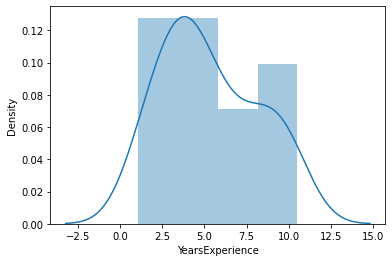

In [178]:
# Check the Data Distribution type
sb.distplot(dataset['YearsExperience'])  #Distribution Plot using Seaborn

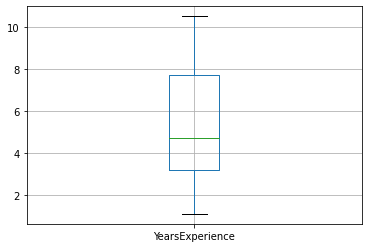

In [179]:
# Check the Outliers of Data
dataset.boxplot(column='YearsExperience') # Checking Data concentration and Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


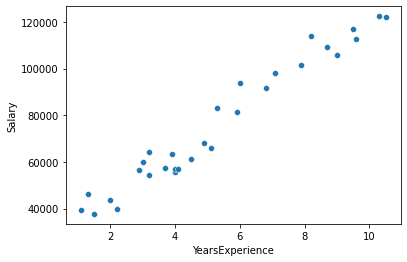

In [180]:
# Check the relationship between the Independent and Dependent Variable
sb.scatterplot(dataset['YearsExperience'],dataset['Salary']) # To check the Linear Correlation

In [181]:
# Check the intensity of the relationship between the Independent and Dependent Variable
np.corrcoef(dataset['YearsExperience'], dataset['Salary']) [0,1] # To check the correlation Coefficient between X and y

0.9782416184887599

In [182]:
# Segregate the Independent Variable(X) and Dependent Variable(y) of the given data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X[:5])
print(y[:5])

[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]
[39343. 46205. 37731. 43525. 39891.]


In [183]:
X1=pd.DataFrame(data=X,columns=['YearsExperience'])

In [184]:
X1.columns

Index(['YearsExperience'], dtype='object')

In [185]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#X_train = 80% of X-data(Years of Expereince); X_test = 20% of X-data(Years of Experience)
#Y_train = 80% of y-data (Salary Data); y_test = 20% of y-data (Salary Data)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24,)
(6, 1)
(6,)


In [186]:
## Verify the Test Data selected randomly
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [187]:
# Fitting the Simple Linear Regression Algorithm to the Training Data set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()
model=regressor.fit(X_train, y_train)

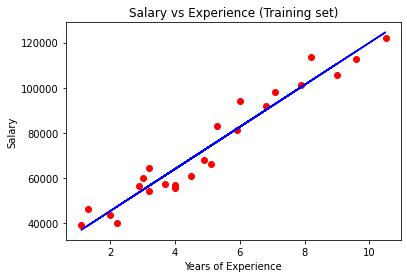

In [188]:
# Visualise the Training set Learning result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [189]:
# Calculate the accuracy of learning by the Algorithm
regressor.score(X_train,y_train) 

0.9411949620562126

In [190]:
# Predict the y values (y_pred) based on the test (X_test) values
y_pred = regressor.predict(X_test)
print(y_test)
print()
print(y_pred)

[ 37731. 122391.  57081.  63218. 116969. 109431.]

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


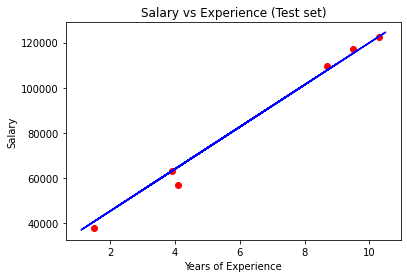

In [191]:
# Visualise the Test set results with Regression line
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [192]:
# Calcualte the accuracy of prediction (y_test Vs y_pred) # This measure is part of Model Evaluation
r2_score(y_test, y_pred)

0.988169515729126

In [193]:
# Calculate the Mean Squarred (MSE)
mse = mean_squared_error(y_test, y_pred)
mse

12823412.298126549

In [194]:
# Calculate the Model Error (RMSE) # This measure is also part of Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

3580.979237321343

In [195]:
# Predict the y vlaue for the given x value
regressor.predict([[15]])

array([166468.72605157])

In [196]:
print("Mean Absolute Error (MAE) :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) :", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_Score : ", r2_score(y_test, y_pred))

Mean Absolute Error (MAE) : 2446.1723690465055
Mean Squared Error (MSE) : 12823412.298126549
Root Mean Squared Error (RMSE) : 3580.979237321343
R2_Score :  0.988169515729126


In [197]:
mean_squared_error1 = np.mean((y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error1) 

Mean squared Error on test set :  12823412.298126549


In [198]:
#adj_r2 = (1 - (1 - r2) * ((train.shape[0] - 1) / 
#          (train.shape[0] - train.shape[1] - 1)))
# train.shape[0] is the number of observations, and train.shape[1] is the number of features.

In [199]:
#Value of Adjusted R2
adj_r2 = (1 - (1 - 0.98) * ((24 - 1) / (24 - 1 - 1)))
adj_r2

0.9790909090909091

In [200]:
print("Training Accuracy :", regressor.score(X_train,y_train))
print("Testing Accuracy :", r2_score(y_test,y_pred))

Training Accuracy : 0.9411949620562126
Testing Accuracy : 0.988169515729126


In [201]:
print("Training Error :", mean_squared_error(X_train,y_train))
print("Testing Error :", mean_squared_error(y_test, y_pred))

Training Error : 6073037710.325
Testing Error : 12823412.298126549


###**Cross Validation**

In [202]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [203]:
# Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [-1.74865029 -1.75284553 -6.50009156  0.49808809  0.26774612  0.04302535]


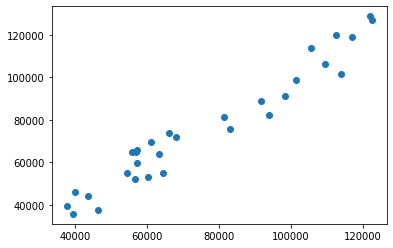

In [204]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [205]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.941273089068848


#Create a pickle file

In [206]:
import pickle
from pathlib import Path
root = Path("/content")
my_path = "/content/gdrive/My Drive/Expsal/Expsal.pickle"
my_file = open(my_path, 'wb')
my_file = pickle.dump(model, my_file)

In [207]:
import json
columns = {
    'data_columns' : [col.lower() for col in X1.columns]
          }
my_jpath = "/content/gdrive/My Drive/Expsal/input.json"          
my_jfile = open(my_jpath, 'w')  
my_jfile = my_jfile.write(json.dumps(columns))     


# Pickle Code for Anaconda where pickle and json files are creted in working directory by default 
import pickle
with open('blr_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))